In [429]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [431]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [433]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sql 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [435]:
# create engine to hawaii.sqlite
engine = sql.create_engine("sqlite:///Resources2/hawaii.sqlite")

In [437]:
# reflect an existing database into a new model
inspector = inspect(engine)
conn = engine.connect()

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [443]:
# Reading and displaying the measurement table
query = """

    select *
    from measurement
    

"""

pd.read_sql(sql = query, con = conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [125]:
# Reading and displaying the station table

query = """

    select *
    from station

"""

pd.read_sql(sql = query, con = conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [129]:
#Joining the Measurement and Station Tables

query = """
    select *
    from measurement
"""
measurement_df = pd.read_sql(sql = query, con = conn)

query = """

    select *
    from station

"""
station_df = pd.read_sql(sql = query, con = conn)

M_S_df = pd.merge(measurement_df, station_df, how = "inner", on =  ["station"] , suffixes = ["_measurement", "_station"])

M_S_df

,id_measurement,station,date,prcp,tobs,id_station,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [449]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with = engine)
Base.classes.keys()

['station', 'measurement']

In [447]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [133]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [137]:
#importing the class 
from datetime import datetime, timezone, timedelta, date

In [145]:
# Find the most recent date in the data set.
most_recent_date = M_S_df['date'].max()
most_recent_date

'2017-08-23'

In [157]:
M_S_df["prcp"].count()

18103

In [459]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
start_date = '2016-08-23'

# Calculate the date one year from the last date in data set.
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > start_date).all()
#prcp

In [231]:
# Perform a query to retrieve the data and precipitation scores
query = """

    select date, prcp
    from measurement m 
    join station s
    on m.station = s.station

"""

pd.read_sql(sql = query, con = conn)

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [233]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp)
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [237]:
# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


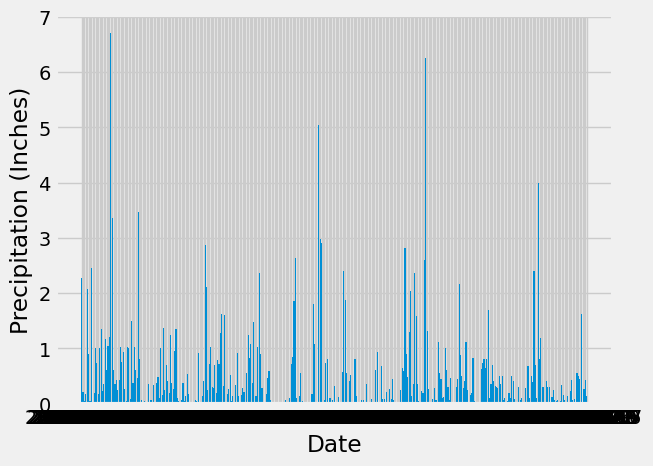

In [225]:
# Use Pandas Plotting with Matplotlib to plot the data (scatter plot)
x_values = prcp_df['date']
y_values = prcp_df['prcp']
plt.bar(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [277]:
# Use Pandas to calculate the summary statistics for the precipitation data
column_series = prcp_df['prcp'].describe()
Summ_Stats = column_series.to_frame()
Summ_Stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [381]:

query = """

    select distinct station, count(station) as count
    from measurement
    group by station
    order by count desc;

"""

pd.read_sql(sql = query, con = conn)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [321]:
# Design a query to calculate the total number of stations in the dataset
query = """

    select count(distinct station) as Count
    from measurement

"""

pd.read_sql(sql = query, con = conn)

,Count
0,9


In [387]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

query = """

    select distinct station, count(station) as count
    from measurement
    group by station
    order by count desc;

"""

active_stations_df = pd.read_sql(sql = query, con = conn)
active_stations_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [409]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """

    select min(tobs) as Min_Value, 
    max(tobs) as Max_Value, 
    avg(tobs) as AVG_Value
    from measurement
    where station = "USC00519281"

"""

pd.read_sql(sql = query, con = conn)

,Min_Value,Max_Value,AVG_Value
0,54.0,85.0,71.663781


In [413]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
#cutoff_date_12month = '2016-08-23'
last_12_months_temps = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > start_date)).all()
last_12_months_temps_df = pd.DataFrame(last_12_months_temps)
last_12_months_temps_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


Text(0.5, 4.183333333333314, 'Temperature')

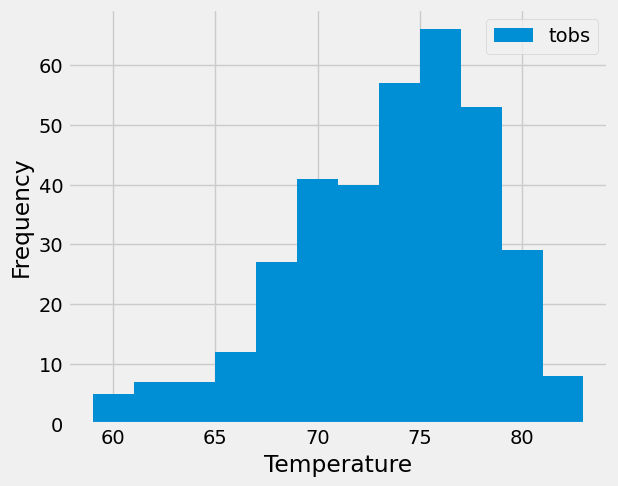

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temps_df.plot.hist(bins=12)

# Close Session

In [407]:
# Close Session
session.close()